# Case Study: Customer Churn Analysis
## Introduction:
This case study involves analyzing the Customer Churn dataset obtained from Kaggle to gain insights into customer churn and identify factors contributing to customer attrition. The dataset contains information about customers of a telecom company, including various attributes and whether the customer churned or not. The objective of this case study is to perform data analysis and statistical analysis to understand customer churn patterns and uncover potential areas for improvement.

### Dataset Overview:
The Customer Churn dataset consists of the following columns:

**customerID:**  Unique identifier for each customer<br>
**gender:**  Customer's gender (categorical)<br>
**SeniorCitizen:** Whether the customer is a senior citizen or not (categorical)<br>
**Partner:** Whether the customer has a partner or not (categorical)<br>
**Dependents:**  Whether the customer has dependents or not (categorical)<br>
**tenure:**  Number of months the customer has stayed with the company (numeric)<br>
**PhoneService:**  Whether the customer has a phone service or not (categorical)<br>
**MultipleLines:**  Whether the customer has multiple lines or not (categorical)<br>
**InternetService:**  Customer's internet service type (categorical)<br>
**OnlineSecurity:**  Whether the customer has online security or not (categorical)<br>
**OnlineBackup:**  Whether the customer has online backup or not (categorical)<br>
**DeviceProtection:**  Whether the customer has device protection or not (categorical)<br>
**TechSupport:**  Whether the customer has tech support or not (categorical)<br>
**StreamingTV:**  Whether the customer has streaming TV or not (categorical)<br>
**StreamingMovies:**  Whether the customer has streaming movies or not (categorical)<br>
**Contract:**  The term of the customer's contract (categorical)<br>
**PaperlessBilling:**  Whether the customer has opted for paperless billing or not (categorical)<br>
**PaymentMethod:**  The customer's payment method (categorical)<br>
**MonthlyCharges:**  The amount charged to the customer monthly (numeric)<br>
**TotalCharges:**  The total amount charged to the customer (numeric)<br>
**Churn:**  Whether the customer churned or not (target variable)<br>

### Steps in the Case Study:

#### Load and preprocess the dataset:

Load the Customer Churn dataset using Pandas.
Handle missing values, if any, by imputation or dropping rows/columns.
Convert categorical variables to the appropriate data type.
#### Perform exploratory data analysis (EDA):

Analyze the distribution of churned and non-churned customers.
Explore the distribution of various attributes such as gender, age, partner status, and contract type.
Calculate summary statistics and visualize the distribution of continuous variables like tenure, monthly charges, and total charges.
Investigate correlations between different variables using correlation analysis and heatmaps.
#### Analyze factors influencing churn:

Examine the relationship between churn and categorical variables such as internet service, online security, tech support, etc.
Conduct statistical tests, such as chi-square tests or t-tests, to identify significant associations between variables and churn.
Visualize the impact of these factors on churn using bar plots or stacked bar plots.
#### Identify customer churn patterns:

Analyze customer tenure and identify whether there are any trends or patterns among churned customers.
Investigate the relationship between churn and customer demographics, such as age, gender, and partner status.
Examine the impact of contract type and payment method on churn rates.
#### Analyze service-related factors:

Explore the relationship between churn and various service-related attributes like online security, tech support, and streaming services.
Assess the impact of service usage, such as internet service type and multiple lines, on churn rates.
Investigate the influence of monthly charges and total charges on churn.
#### Calculate customer retention metrics:

Calculate customer churn rate, retention rate, and other relevant metrics to assess the company's overall churn performance.
Compare churn rates across different customer segments, such as senior citizens, customers with partners, or customers with paperless billing.
#### Provide insights and recommendations:

Summarize the findings from the analysis, highlighting the key factors influencing churn.
Provide actionable recommendations to reduce churn based on the insights gained.
Suggest potential improvements to customer service, marketing strategies, or pricing plans based on the analysis.

In [157]:
# Import basic lbraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


import warnings
warnings.filterwarnings('ignore') # Ignoring all the warnings in the sheet that may occur

In [158]:
data = pd.read_csv('customer_churn_dataset.csv')
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [159]:
data.shape

(7043, 21)

In [160]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [161]:
data.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [162]:
df =data

In [163]:
df['gender'].value_counts()

Male      3555
Female    3488
Name: gender, dtype: int64

In [164]:
df['SeniorCitizen'].value_counts()

0    5901
1    1142
Name: SeniorCitizen, dtype: int64

In [165]:
print(df['Partner'].value_counts())
print(df['PhoneService'].value_counts())
print(df['MultipleLines'].value_counts())
print(df['InternetService'].value_counts())

No     3641
Yes    3402
Name: Partner, dtype: int64
Yes    6361
No      682
Name: PhoneService, dtype: int64
No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64
Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64


In [166]:
print(df['tenure'].value_counts())

1     613
72    362
2     238
3     200
4     176
     ... 
28     57
39     56
44     51
36     50
0      11
Name: tenure, Length: 73, dtype: int64


In [167]:
print(df['Dependents'].value_counts())

No     4933
Yes    2110
Name: Dependents, dtype: int64


In [168]:
churn_rate = df['Churn'].value_counts(normalize= True)
churn_rate

No     0.73463
Yes    0.26537
Name: Churn, dtype: float64

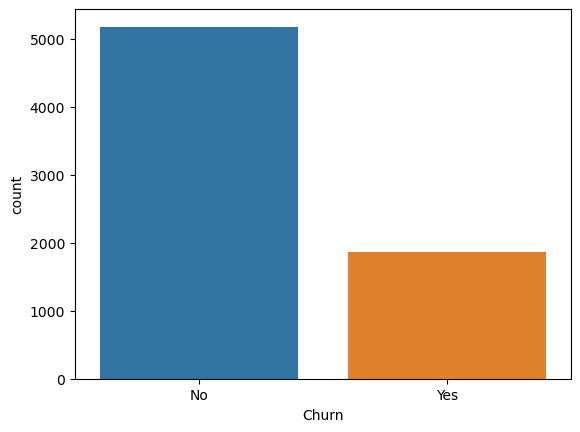

In [169]:
sns.countplot(data = df, x = 'Churn')
plt.show()

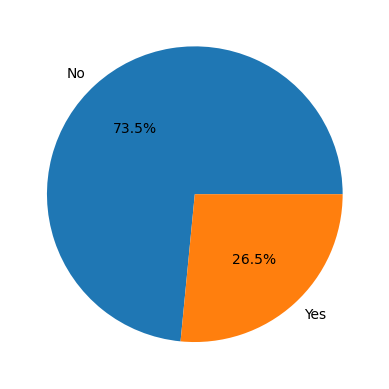

In [170]:
plt.pie(churn_rate, autopct='%1.1f%%', labels= churn_rate.index)
plt.show()

In [171]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

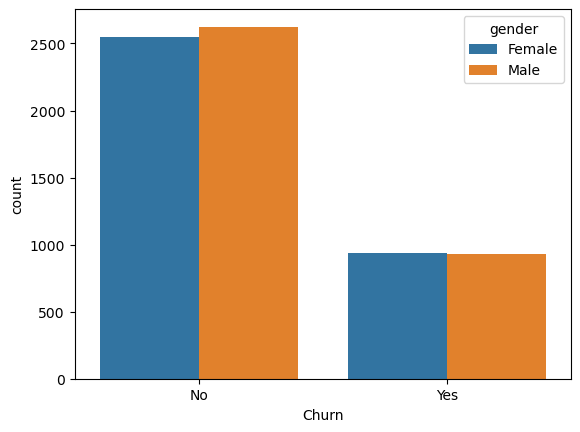

In [172]:
sns.countplot(data = df, x = 'Churn', hue='gender')
plt.show()

In [173]:
sr_citizen = df['SeniorCitizen'].value_counts(normalize= True)
sr_citizen

0    0.837853
1    0.162147
Name: SeniorCitizen, dtype: float64

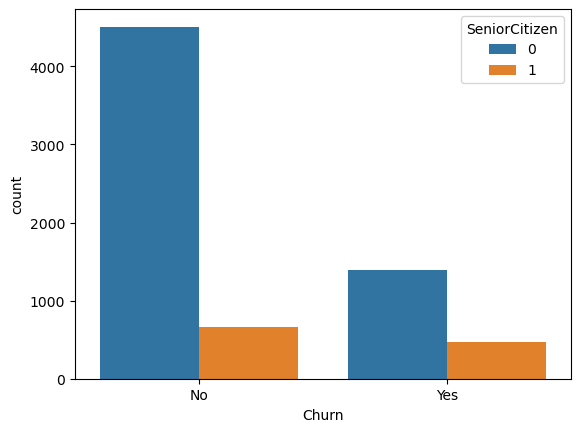

In [174]:
sns.countplot(data = df, x = 'Churn', hue='SeniorCitizen')
plt.show()

### PhoneService

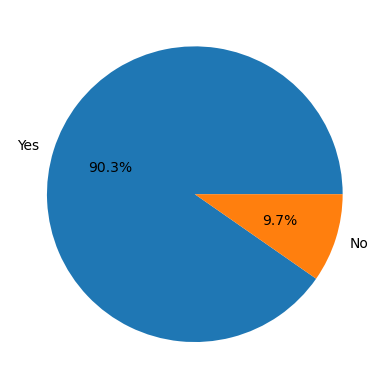

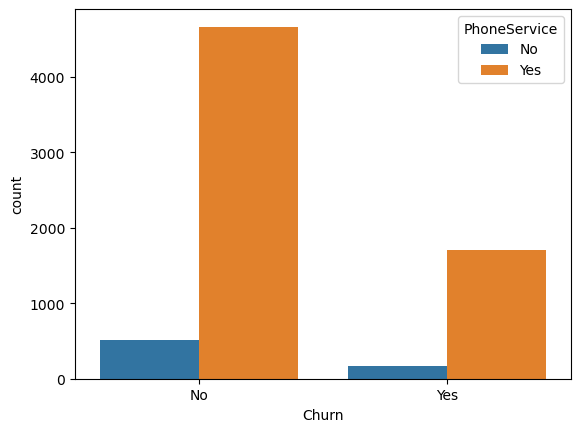

In [175]:
PhoneService = df['PhoneService'].value_counts(normalize= True)
PhoneService

plt.pie(PhoneService, autopct='%1.1f%%', labels= PhoneService.index)
plt.show()

sns.countplot(data = df, x = 'Churn', hue='PhoneService')
plt.show()

### MultipleLines

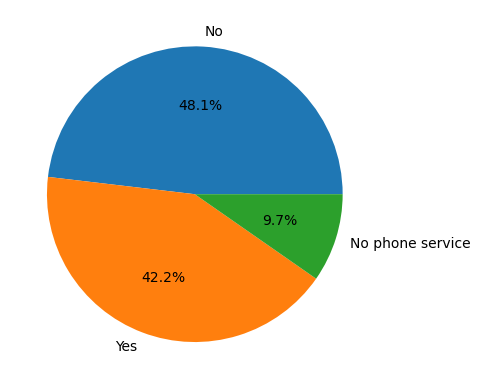

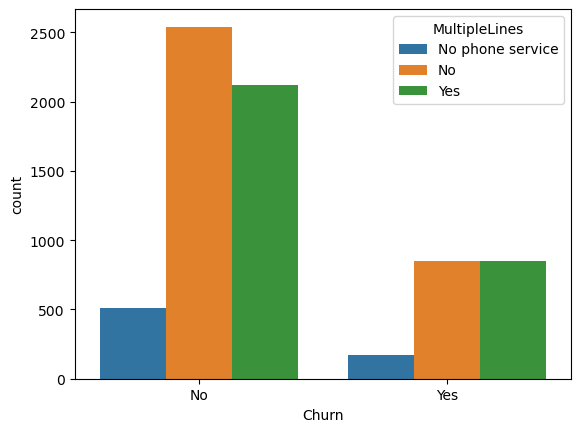

In [176]:
MultipleLines = df['MultipleLines'].value_counts(normalize= True)
MultipleLines

plt.pie(MultipleLines, autopct='%1.1f%%', labels= MultipleLines.index)
plt.show()

sns.countplot(data = df, x = 'Churn', hue='MultipleLines')
plt.show()

### InternetService

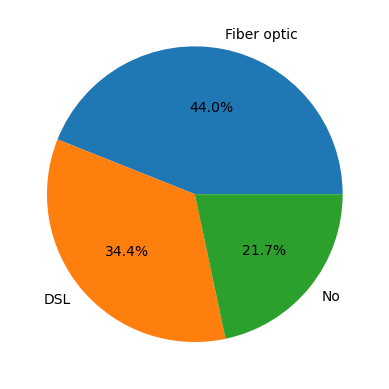

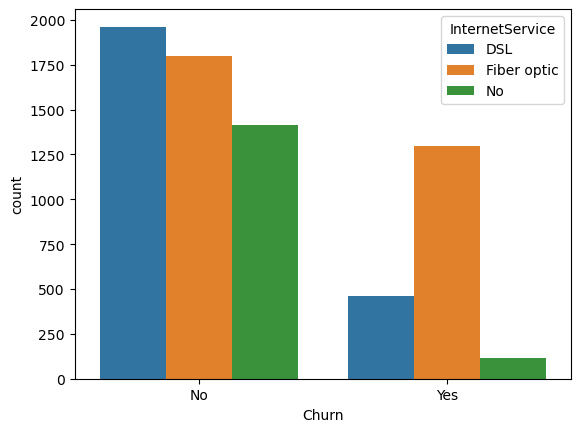

In [177]:
InternetService = df['InternetService'].value_counts(normalize= True)
InternetService

plt.pie(InternetService, autopct='%1.1f%%', labels= InternetService.index)
plt.show()

sns.countplot(data = df, x = 'Churn', hue='InternetService')
plt.show()

##### RECOMMENDATION: We should look ath the services of Fiber optics as customer are leaving more in Fiber optic as compared the DSL option

### OnlineSecurity

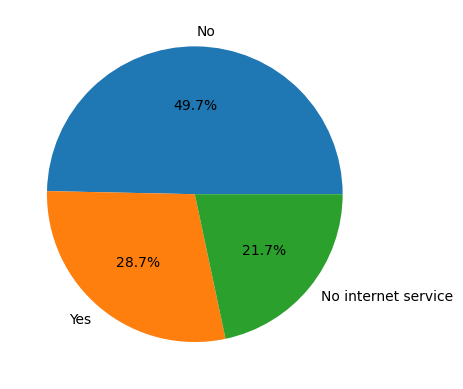

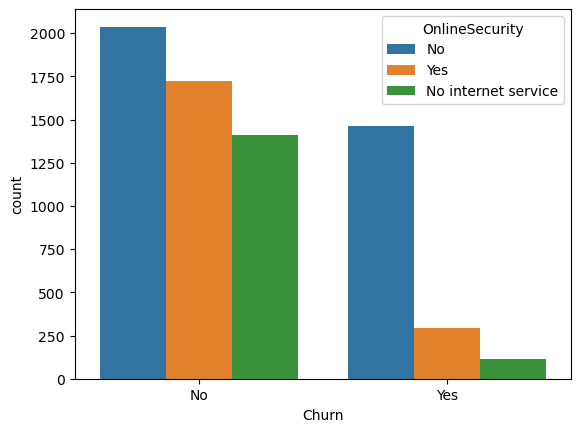

In [178]:
OnlineSecurity = df['OnlineSecurity'].value_counts(normalize= True)
OnlineSecurity

plt.pie(OnlineSecurity, autopct='%1.1f%%', labels= OnlineSecurity.index)
plt.show()

sns.countplot(data = df, x = 'Churn', hue='OnlineSecurity')
plt.show()

In [179]:
'OnlineBackup', 'DeviceProtection', 'TechSupport',

('OnlineBackup', 'DeviceProtection', 'TechSupport')

### OnlineBackup

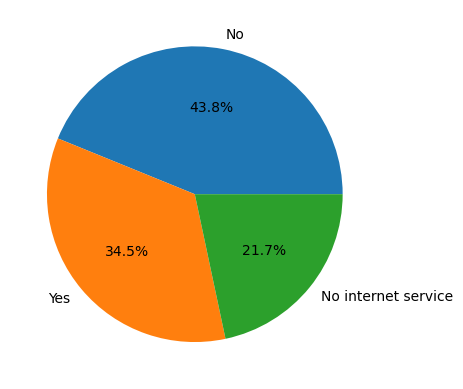

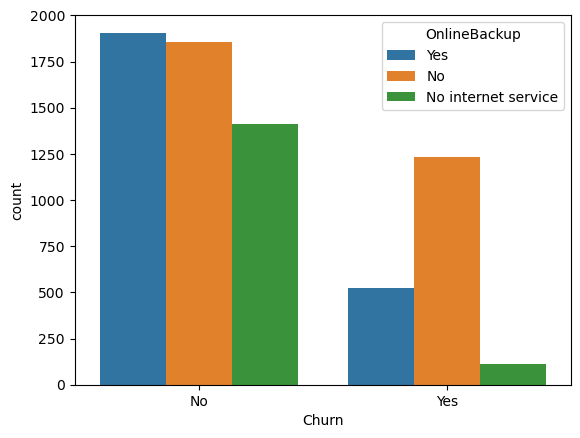

In [180]:
OnlineBackup = df['OnlineBackup'].value_counts(normalize= True)
OnlineSecurity

plt.pie(OnlineBackup, autopct='%1.1f%%', labels= OnlineBackup.index)
plt.show()

sns.countplot(data = df, x = 'Churn', hue='OnlineBackup')
plt.show()

### DeviceProtection

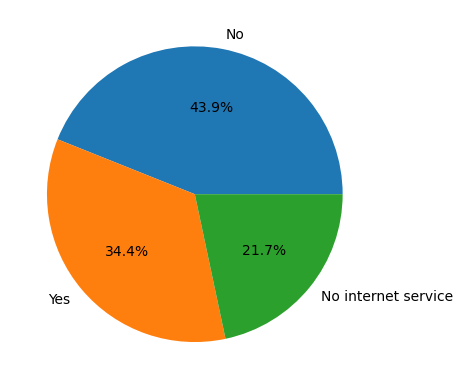

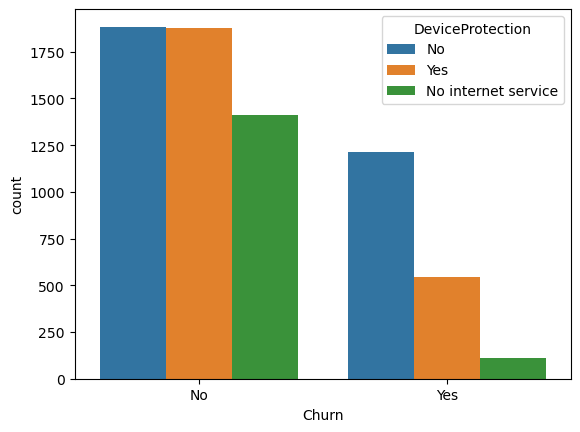

In [181]:
DeviceProtection = df['DeviceProtection'].value_counts(normalize= True)
DeviceProtection

plt.pie(DeviceProtection, autopct='%1.1f%%', labels= DeviceProtection.index)
plt.show()

sns.countplot(data = df, x = 'Churn', hue='DeviceProtection')
plt.show()

### TechSupport

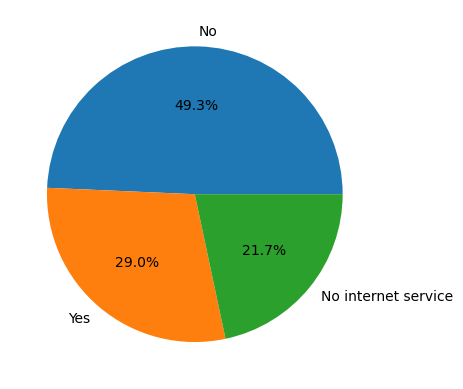

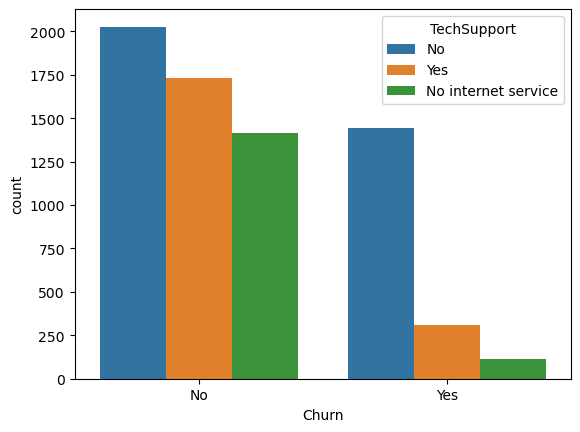

In [182]:
TechSupport = df['TechSupport'].value_counts(normalize= True)
TechSupport

plt.pie(TechSupport, autopct='%1.1f%%', labels= TechSupport.index)
plt.show()

sns.countplot(data = df, x = 'Churn', hue='TechSupport')
plt.show()

### Recommendation: 

People who have not taken any extra services they tend to leave more as compared to people who have opted for more services

In [183]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [184]:
#df['TotalCharges'] = df['TotalCharges'].astype('float64')

In [185]:
df['TotalCharges'].dtype

dtype('O')

In [186]:
# 'errors' parameter set to 'coerce' will replace non-numeric values with NaN

df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

In [187]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [188]:
df.dropna(inplace= True)

In [189]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 


In [190]:
df.reset_index(inplace= True)

In [191]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   index             7032 non-null   int64  
 1   customerID        7032 non-null   object 
 2   gender            7032 non-null   object 
 3   SeniorCitizen     7032 non-null   int64  
 4   Partner           7032 non-null   object 
 5   Dependents        7032 non-null   object 
 6   tenure            7032 non-null   int64  
 7   PhoneService      7032 non-null   object 
 8   MultipleLines     7032 non-null   object 
 9   InternetService   7032 non-null   object 
 10  OnlineSecurity    7032 non-null   object 
 11  OnlineBackup      7032 non-null   object 
 12  DeviceProtection  7032 non-null   object 
 13  TechSupport       7032 non-null   object 
 14  StreamingTV       7032 non-null   object 
 15  StreamingMovies   7032 non-null   object 
 16  Contract          7032 non-null   object 


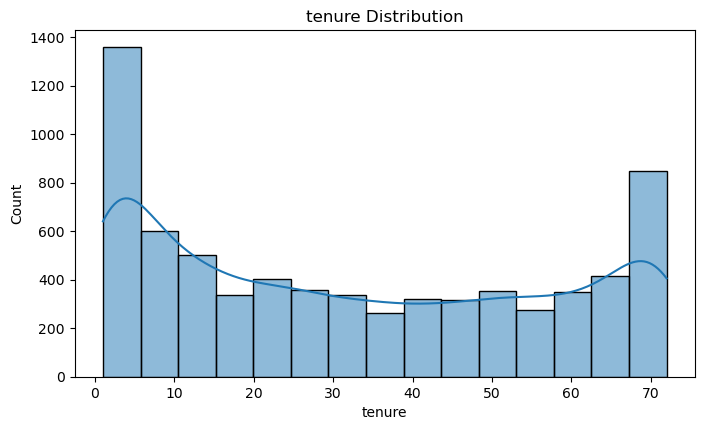

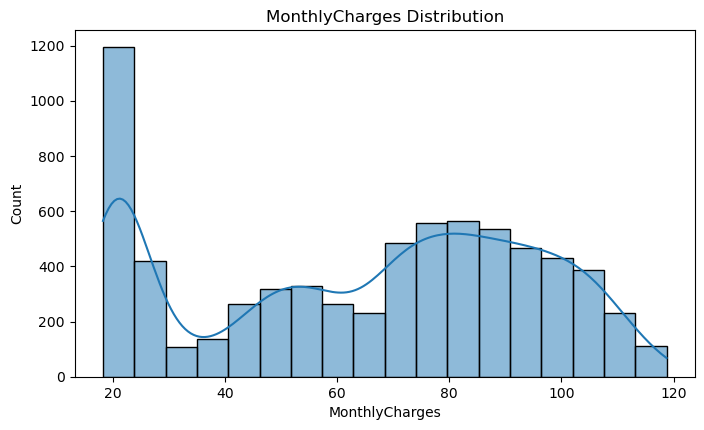

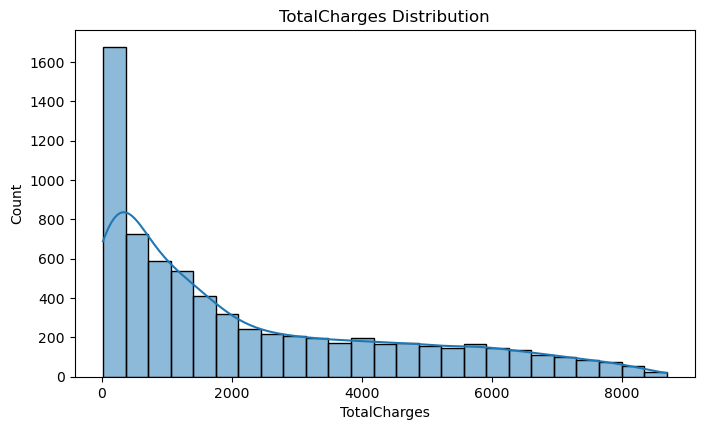

In [192]:
numerical_vars = ['tenure', 'MonthlyCharges', 'TotalCharges']

for var in numerical_vars:
    plt.figure(figsize = (8, 4.5))
    sns.histplot(data[var], kde = True)
    plt.title(f'{var} Distribution')
    plt.show()

### Lets take summary of the data

In [193]:
df[numerical_vars].describe()

,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000
mean,32.421786,64.798208,2283.300441
std,24.545260,30.085974,2266.771362
min,1.000000,18.250000,18.800000
25%,9.000000,35.587500,401.450000
50%,29.000000,70.350000,1397.475000
75%,55.000000,89.862500,3794.737500
max,72.000000,118.750000,8684.800000


### Lets create Boxplots for Univaroiate data

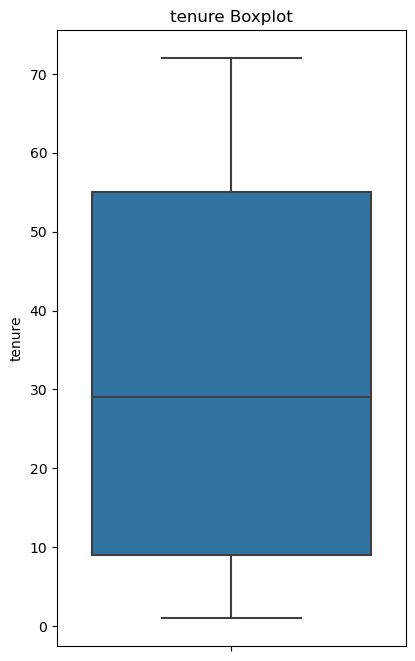

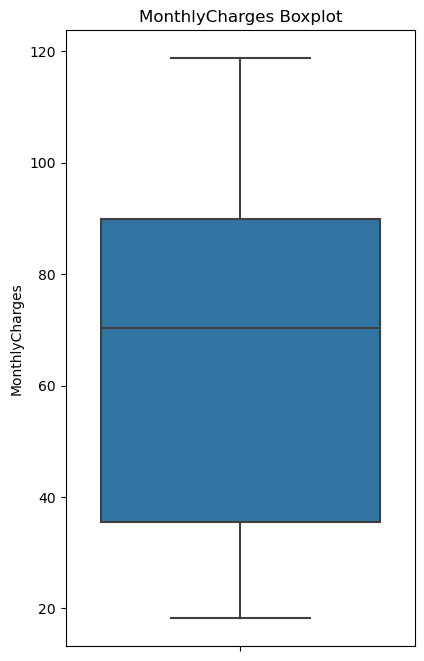

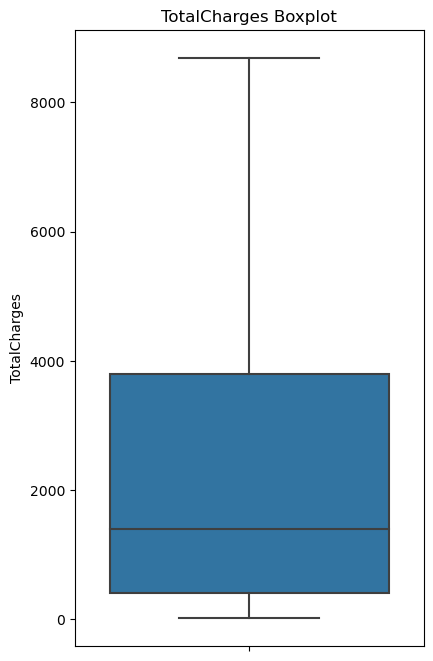

In [194]:
numerical_vars = ['tenure', 'MonthlyCharges', 'TotalCharges']

for var in numerical_vars:
    plt.figure(figsize = (4.5, 8))
    sns.boxplot(y= var, data = df)
    plt.title(f'{var} Boxplot')
    plt.show()

### Bivarite Analytics

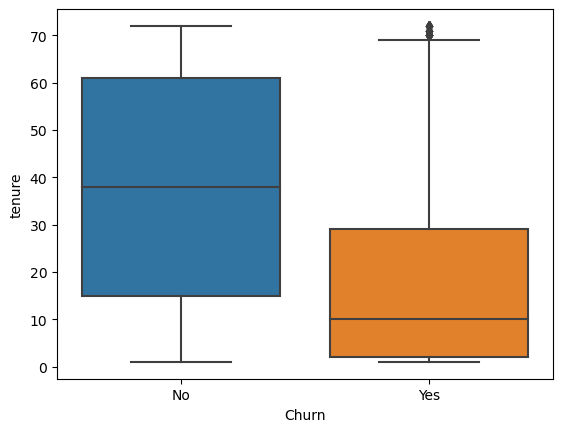

In [195]:
# Tenure Distribution by Churn

sns.boxplot(x = "Churn", y = 'tenure', data = df)
plt.show()

#### Recommendation in Please pickup the people who have higer tenure and conduct a survey to solve their problems Procatively

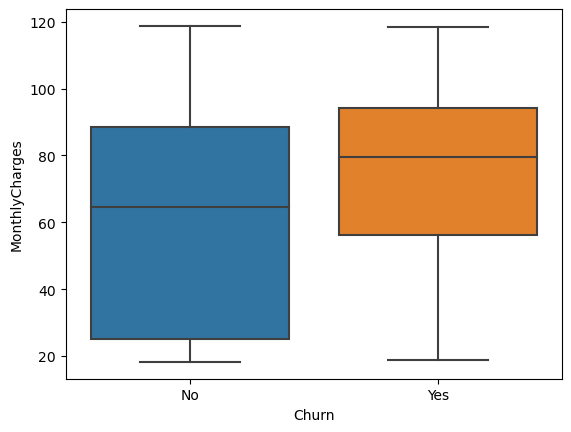

In [196]:
# Tenure Distribution by MonthlyCharges

sns.boxplot(x = "Churn", y = 'MonthlyCharges', data = df)
plt.show()

### Recommendation: 
Please identify cutometer who are paing approax $ 89.862500 and above.. check if they are facing any problems

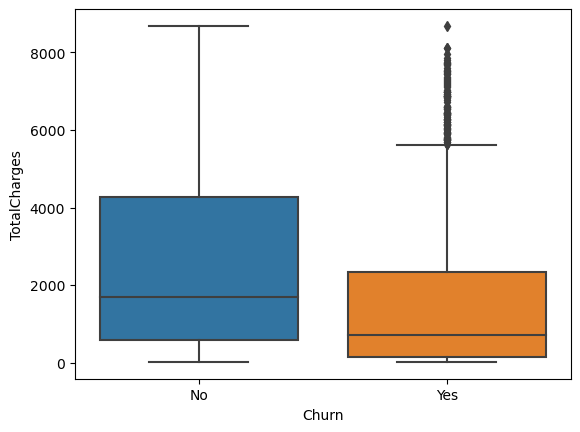

In [197]:
# Tenure Distribution by TotalCharges

sns.boxplot(x = "Churn", y = 'TotalCharges', data = df)
plt.show()

In [198]:
# Calculate the correlation Matrix

df

,index,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7028,7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7029,7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7030,7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


In [199]:
churn_mapping = {'Yes':1, "No":0}
df['Churn'] = df['Churn'].map(churn_mapping)
df.head()

,index,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
2,2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1


In [200]:
correlation_matrix = df.corr()
correlation_matrix

,index,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn
index,1.000000,0.008057,0.006801,-0.012938,0.001820,0.010133
SeniorCitizen,0.008057,1.000000,0.015683,0.219874,0.102411,0.150541
tenure,0.006801,0.015683,1.000000,0.246862,0.825880,-0.354049
MonthlyCharges,-0.012938,0.219874,0.246862,1.000000,0.651065,0.192858
TotalCharges,0.001820,0.102411,0.825880,0.651065,1.000000,-0.199484
Churn,0.010133,0.150541,-0.354049,0.192858,-0.199484,1.000000


### Analyze the impact of contract type on churn rates

In [201]:
contract_churn_rate = data.groupby('Contract')['Churn'].mean()
contract_churn_rate

Contract
Month-to-month    0.427097
One year          0.112772
Two year          0.028487
Name: Churn, dtype: float64

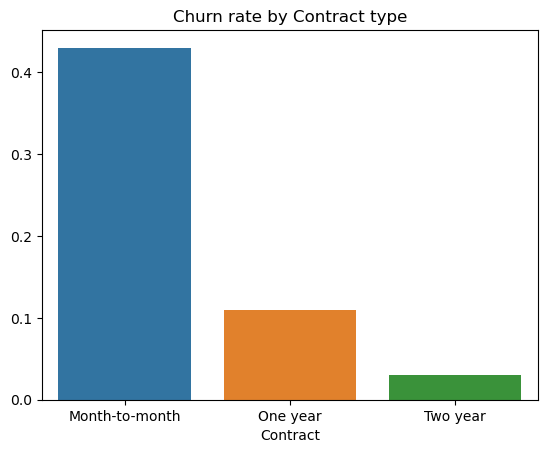

In [202]:
# Visualize the churn rates by contract type

contract_churn_rate = round(contract_churn_rate, 2)

sns.barplot(x = contract_churn_rate.index, y = contract_churn_rate.values)
plt.title("Churn rate by Contract type")
plt.show()

In [203]:
# Analyze the churn rate by tenure

churn_by_tenure = data.groupby('tenure')['Churn'].mean()
churn_by_tenure

tenure
1     0.619902
2     0.516807
3     0.470000
4     0.471591
5     0.481203
        ...   
68    0.090000
69    0.084211
70    0.092437
71    0.035294
72    0.016575
Name: Churn, Length: 72, dtype: float64

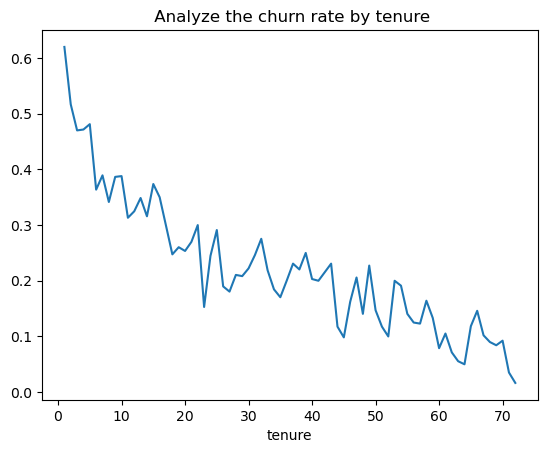

In [204]:
sns.lineplot(x = churn_by_tenure.index, y = churn_by_tenure.values)
plt.title(" Analyze the churn rate by tenure")

plt.show()

In [205]:
df.columns

Index(['index', 'customerID', 'gender', 'SeniorCitizen', 'Partner',
       'Dependents', 'tenure', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges',
       'Churn'],
      dtype='object')

In [206]:
# Lets analyze the customer base on thir demorgraphics

gender_churn_rate = data.groupby('gender')['Churn'].mean()
Sencit_churn_rate = data.groupby('SeniorCitizen')['Churn'].mean()
partner_churn_rate = data.groupby('Partner')['Churn'].mean()
Dependents_churn_rate = data.groupby('Dependents')['Churn'].mean()

Text(0, 0.5, 'Churn Rate')

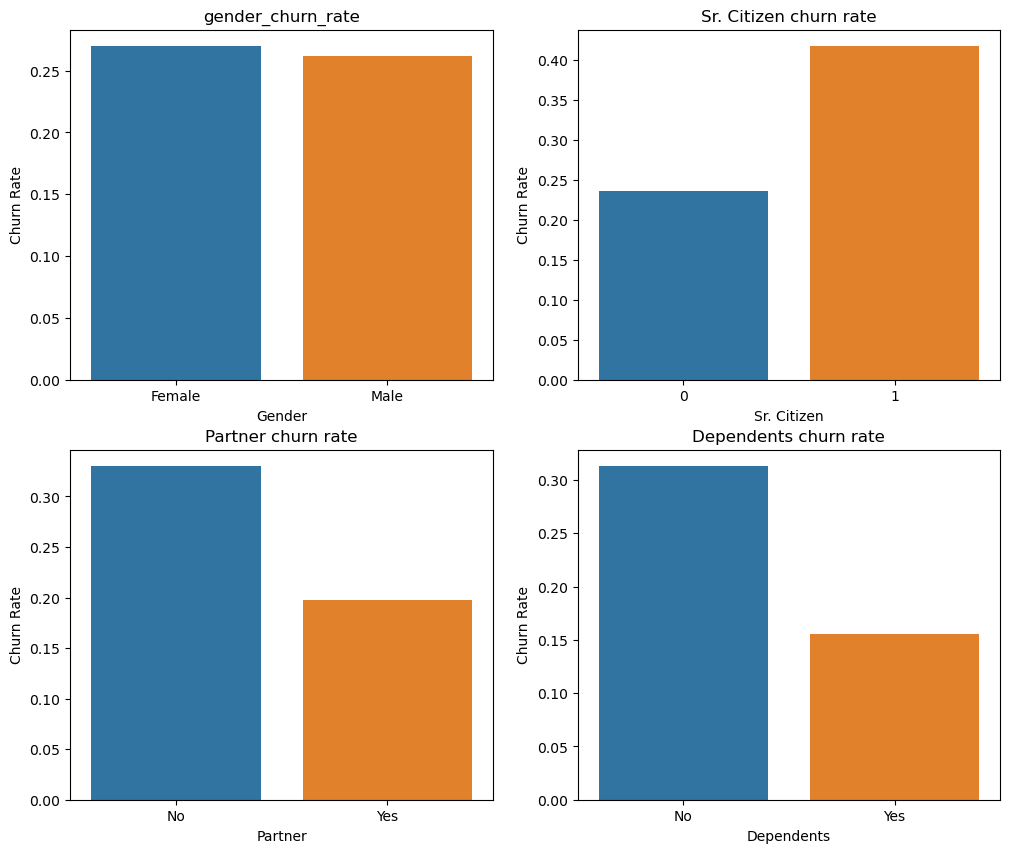

In [207]:
# Lets create the  graph forcustomer base on thir demorgraphics

plt.figure(figsize=(12, 10))

plt.subplot(2, 2, 1)
sns.barplot(x = gender_churn_rate.index, y = gender_churn_rate.values)
plt.title('gender_churn_rate')
plt.xlabel('Gender')
plt.ylabel('Churn Rate')

plt.subplot(2, 2, 2)
sns.barplot(x = Sencit_churn_rate.index, y = Sencit_churn_rate.values)
plt.title('Sr. Citizen churn rate')
plt.xlabel("Sr. Citizen")
plt.ylabel("Churn Rate")

plt.subplot(2,2, 3)
sns.barplot(x = partner_churn_rate.index, y = partner_churn_rate.values)
plt.title('Partner churn rate')
plt.xlabel("Partner")
plt.ylabel("Churn Rate")

plt.subplot(2,2, 4)
sns.barplot(x = Dependents_churn_rate.index, y = Dependents_churn_rate.values)
plt.title('Dependents churn rate')
plt.xlabel("Dependents")
plt.ylabel("Churn Rate")

### Recommendations:

Gender has no impact on attrition<br>
Sr. Citizen are not able to find the services useful or they have dofficulty in using the services<br>
Partners tend to leave less as compared to the non Partners<br>

### Visualize the churn rates by service-related factors

In [208]:
df.columns

Index(['index', 'customerID', 'gender', 'SeniorCitizen', 'Partner',
       'Dependents', 'tenure', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges',
       'Churn'],
      dtype='object')

In [209]:
InternetService_churn_rate = data.groupby('InternetService')['Churn'].mean()
OnlineSecurity_churn_rate= data.groupby('OnlineSecurity')['Churn'].mean()
OnlineBackup_churn_rate=data.groupby('OnlineBackup')['Churn'].mean()
TechSupport_churn_rate=data.groupby('TechSupport')['Churn'].mean()

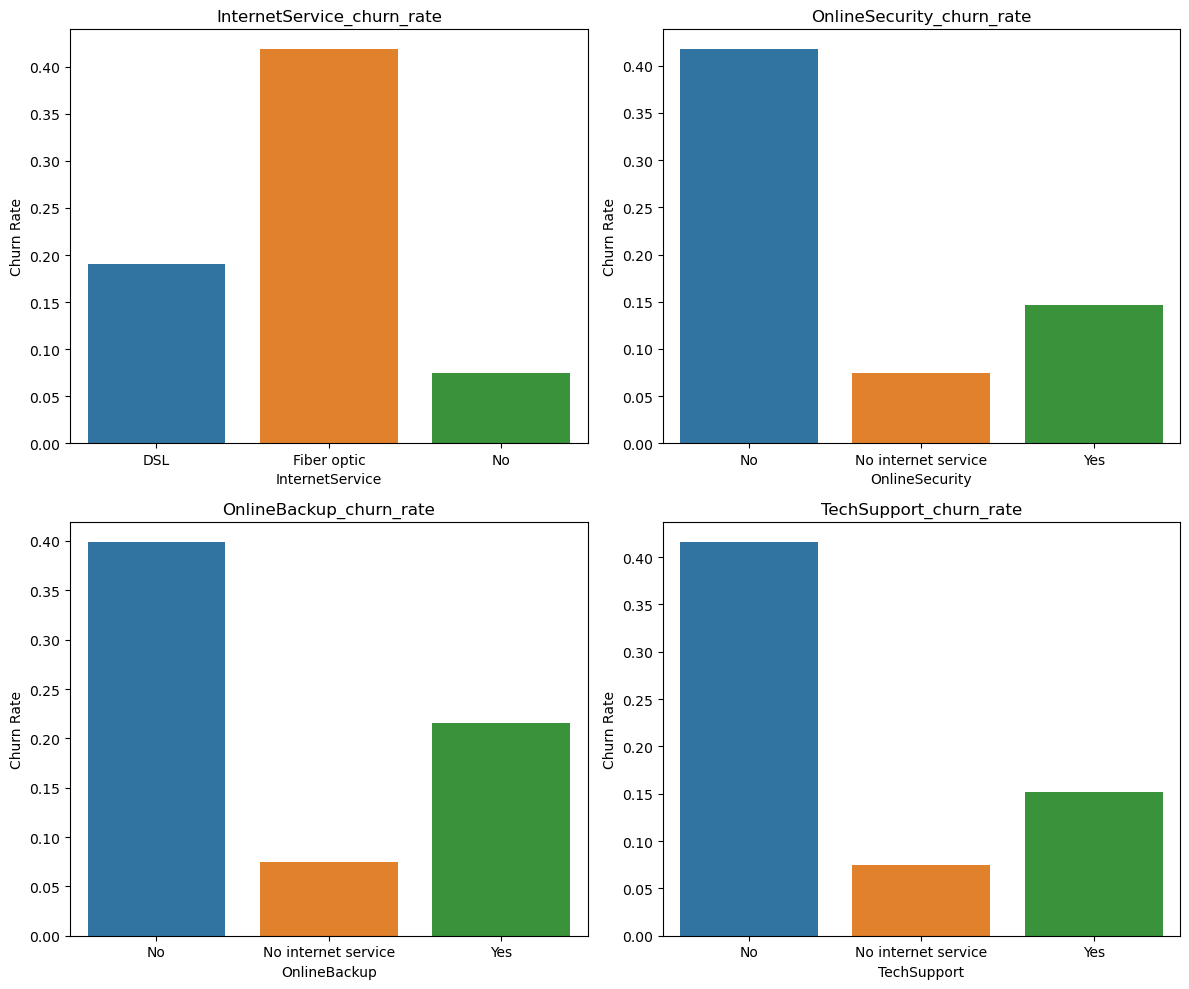

In [210]:
plt.figure(figsize=(12, 10))

plt.subplot(2,2,1)
sns.barplot(x= InternetService_churn_rate.index, y= InternetService_churn_rate.values)
plt.title("InternetService_churn_rate")
plt.xlabel("InternetService")
plt.ylabel("Churn Rate")

plt.subplot(2,2,2)
sns.barplot(x = OnlineSecurity_churn_rate.index, y = OnlineSecurity_churn_rate.values)
plt.title("OnlineSecurity_churn_rate")
plt.xlabel("OnlineSecurity")
plt.ylabel("Churn Rate")

plt.subplot(2,2,3)
sns.barplot(x = OnlineBackup_churn_rate.index, y = OnlineBackup_churn_rate.values)
plt.title("OnlineBackup_churn_rate")
plt.xlabel("OnlineBackup")
plt.ylabel("Churn Rate")


plt.subplot(2,2,4)
sns.barplot(x = TechSupport_churn_rate.index, y = TechSupport_churn_rate.values)
plt.title("TechSupport_churn_rate")
plt.xlabel("TechSupport")
plt.ylabel("Churn Rate")


plt.tight_layout()
plt.show()

In [211]:
#### Lets cluster out the values based on Monthly charges and Total Charges

In [212]:
numerical_vars

['tenure', 'MonthlyCharges', 'TotalCharges']

In [213]:
# Lets cluster the data

X_cluster = df[numerical_vars]
X_cluster

,tenure,MonthlyCharges,TotalCharges
0,1,29.85,29.85
1,34,56.95,1889.50
2,2,53.85,108.15
3,45,42.30,1840.75
4,2,70.70,151.65
...,...,...,...
7027,24,84.80,1990.50
7028,72,103.20,7362.90
7029,11,29.60,346.45
7030,4,74.40,306.60


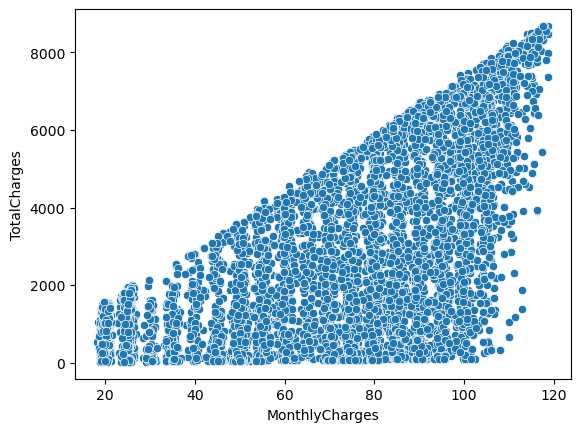

In [214]:
sns.scatterplot(x = X_cluster['MonthlyCharges'], y = X_cluster['TotalCharges'])
plt.show()

In [215]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans


In [216]:
X_cluster

,tenure,MonthlyCharges,TotalCharges
0,1,29.85,29.85
1,34,56.95,1889.50
2,2,53.85,108.15
3,45,42.30,1840.75
4,2,70.70,151.65
...,...,...,...
7027,24,84.80,1990.50
7028,72,103.20,7362.90
7029,11,29.60,346.45
7030,4,74.40,306.60


In [217]:
scalar = StandardScaler()
data_scaled = scalar.fit_transform(X_cluster)
data_scaled

array([[-1.28024804, -1.16169394, -0.99419409],
       [ 0.06430269, -0.26087792, -0.17373982],
       [-1.23950408, -0.36392329, -0.95964911],
       ...,
       [-0.87280842, -1.17000405, -0.85451414],
       [-1.15801615,  0.31916782, -0.87209546],
       [ 1.36810945,  1.35793167,  2.01234407]])

In [218]:
# Define the number of clusters

num_clusters = 3

# Lets apply K means

kmeans = KMeans(n_clusters= num_clusters, random_state= 68869)

X_cluster['cluster'] = kmeans.fit_predict(data_scaled)
X_cluster.head()

,tenure,MonthlyCharges,TotalCharges,cluster
0,1,29.85,29.85,2
1,34,56.95,1889.50,0
2,2,53.85,108.15,0
3,45,42.30,1840.75,2
4,2,70.70,151.65,0


In [219]:
X_cluster['cluster'].value_counts()

0    2685
1    2200
2    2147
Name: cluster, dtype: int64

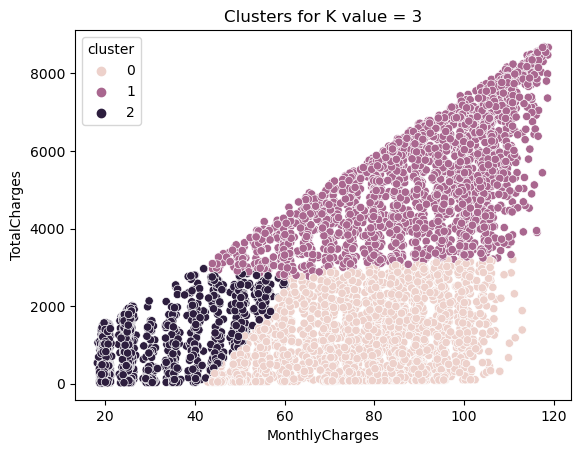

In [221]:
sns.scatterplot(x = 'MonthlyCharges', y= 'TotalCharges', data=X_cluster , hue='cluster')
plt.title("Clusters for K value = 3")
plt.xlabel('MonthlyCharges')
plt.ylabel('TotalCharges')

plt.show()

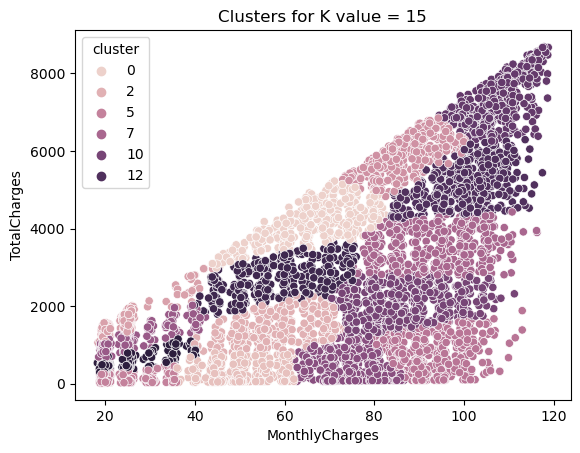

In [225]:
# Define the number of clusters
num_clusters = 15

# Lets apply K means
kmeans = KMeans(n_clusters= num_clusters, random_state= 68869)

# adding data to the dataframe as a new column
X_cluster['cluster'] = kmeans.fit_predict(data_scaled)
X_cluster.head()

# Creating a scatter plot to visualize the data obtained from clustering
sns.scatterplot(x = 'MonthlyCharges', y= 'TotalCharges', data=X_cluster , hue='cluster')
plt.title("Clusters for K value = 15")
plt.xlabel('MonthlyCharges')
plt.ylabel('TotalCharges')

plt.show()

#### How many clusters are relevant(do we need?) whatbis the right value of K (k =no. Of cluster)

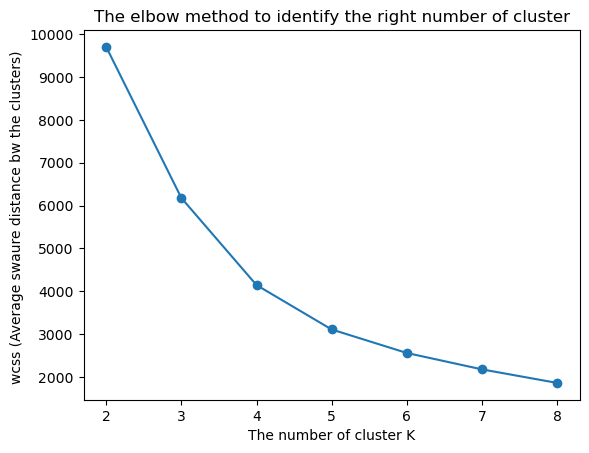

In [229]:
# Lets define a blank list
wcss = [] ## withon cluster sum of squares


for k in range(2, 9):
    kmeans = KMeans(n_clusters=k, random_state= 97998)
    kmeans.fit(data_scaled)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(2, 9), wcss, marker= 'o')
plt.xlabel("The number of cluster K")
plt.ylabel("wcss (Average swaure distance bw the clusters) ")
plt.title("The elbow method to identify the right number of cluster")

plt.show()

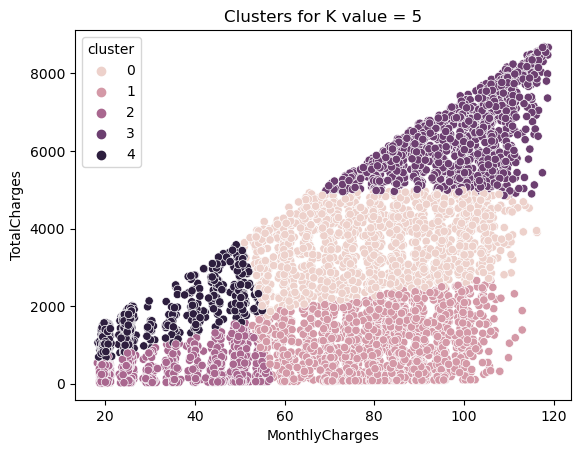

In [230]:
# Define the number of clusters
num_clusters = 5

# Lets apply K means
kmeans = KMeans(n_clusters= num_clusters, random_state= 68869)

# adding data to the dataframe as a new column
X_cluster['cluster'] = kmeans.fit_predict(data_scaled)
X_cluster.head()

# Creating a scatter plot to visualize the data obtained from clustering
sns.scatterplot(x = 'MonthlyCharges', y= 'TotalCharges', data=X_cluster , hue='cluster')
plt.title("Clusters for K value = 5")
plt.xlabel('MonthlyCharges')
plt.ylabel('TotalCharges')

plt.show()

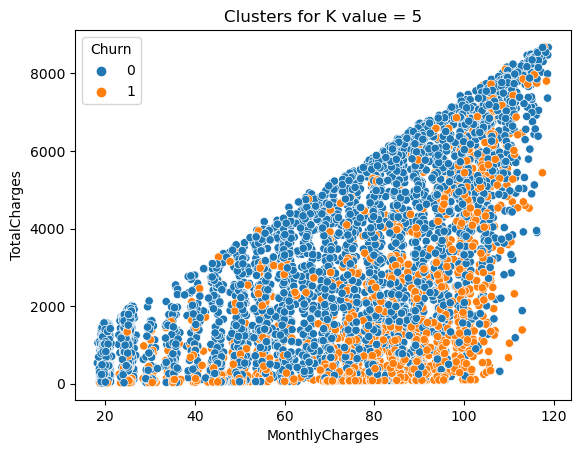

In [231]:
# Creating a scatter plot to visualize the data obtained from clustering
sns.scatterplot(x = 'MonthlyCharges', y= 'TotalCharges', data=df , hue='Churn')
plt.title("Clusters for K value = 5")
plt.xlabel('MonthlyCharges')
plt.ylabel('TotalCharges')

plt.show()

In [232]:
numerical_vars

['tenure', 'MonthlyCharges', 'TotalCharges']

In [233]:
df.columns

Index(['index', 'customerID', 'gender', 'SeniorCitizen', 'Partner',
       'Dependents', 'tenure', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges',
       'Churn'],
      dtype='object')

In [234]:
# Define the number of clusters
num_clusters = 5

# Lets apply K means
kmeans = KMeans(n_clusters= num_clusters, random_state= 68869)

# adding data to the dataframe as a new column
df['cluster'] = kmeans.fit_predict(data_scaled)
df.head()


,index,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,cluster
0,0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,...,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0,2
1,1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,...,No,No,No,One year,No,Mailed check,56.95,1889.50,0,0
2,2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,...,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1,2
3,3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,...,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0,4
4,4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,...,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1,1


### Cluster_Statistics

In [235]:
cluster_statistics = df.groupby('cluster')[numerical_vars].mean()
cluster_statistics

,tenure,MonthlyCharges,TotalCharges
cluster,,,
0,46.064841,80.096902,3588.916895
1,11.741071,79.610399,927.987447
2,10.050755,31.690725,302.143505
3,64.985370,98.853614,6411.349355
4,53.683640,27.727248,1471.103467


## Summary of our EDA

In [239]:
# Lets create a summary report for the insights and recommendations

print("---- Customer Churn analytics Report------")

# Key Insights
print("Key Insights")

print("The current Customer Churn rate is 26.5%, which is very high as per the industry standards")
print("The churn Rates avry across different customer segments")
print("Customer with shorter tenure are less are likely to leave")
print("Service related factors like" 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'impact the churn')
print("The MonthlyCharges and TotalCharges are impacting the churn rate")
print("There are people who have opted for Fiber services are likely to leave more")
print("Sr. Citizen are finding it difficut to cope up with our services")
print("churn rate is not gender specific")

## Recommendations
print("Run some reention campaign for the below cluster")

### 1. People who have shorter duration of the services
### 2.  who have very less total charges
### 3. who are sr. citizen try make the GUI/Services simpler
### 4. Try giving some offer to people to opt for more and nore services
### 5.  More services customer subscribe less chances of attrition
### 6. Focus ofn the fiber services customer are not showing the loyalty toearsd the services in Fiber

---- Customer Churn analytics Report------
Key Insights
The current Customer Churn rate is 26.5%, which is very high as per the industry standards
The churn Rates avry across different customer segments
Customer with shorter tenure are less are likely to leave
Service related factors likePhoneService MultipleLines InternetService OnlineSecurity OnlineBackup DeviceProtection TechSupport impact the churn
The MonthlyCharges and TotalCharges are impacting the churn rate
There are people who have opted for Fiber services are likely to leave more
Sr. Citizen are finding it difficut to cope up with our services
churn rate is not gender specific
Run some reention campaign for the below cluster
